<a href="https://www.kaggle.com/code/handandegerli/sorting-products?scriptVersionId=180718428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
###################################################
# Sorting Products
###################################################

###################################################
# Uygulama: Kurs Sıralama
###################################################
import pandas as pd
import math
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df = pd.read_csv("/kaggle/input/sortingproductsdataset/product_sorting.csv")
print(df.shape)
df.head(10)



(32, 10)


,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.80000,4621,3466,924,185,46,6
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.40000,2362,1582,567,165,24,24
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.60000,1027,688,257,51,10,21
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.60000,969,717,194,38,10,10
5,Course_1,Instructor_2,4601,4.80000,213,164,45,4,0,0
6,Course_2,Instructor_3,3171,4.70000,856,582,205,51,9,9
7,Veri Bilimi için İstatistik: Python ile İstati...,Veri Bilimi Okulu,929,4.50000,126,88,26,9,0,3
8,A'dan Z'ye Apache Spark (Scala & Python),Veri Bilimi Okulu,6920,4.70000,214,154,41,13,2,4
9,Modern R Programlama Eğitimi,Veri Bilimi Okulu,6537,4.40000,901,559,252,72,9,9


In [2]:
####################
# Sorting by Rating
####################

df.sort_values("rating", ascending=False).head(20)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.80000,4621,3466,924,185,46,6
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.80000,2266,1654,499,91,22,0
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,3155,4.80000,235,200,31,4,0,0
5,Course_1,Instructor_2,4601,4.80000,213,164,45,4,0,0
6,Course_2,Instructor_3,3171,4.70000,856,582,205,51,9,9
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.70000,2425,1722,510,145,24,24
8,A'dan Z'ye Apache Spark (Scala & Python),Veri Bilimi Okulu,6920,4.70000,214,154,41,13,2,4
13,Course_5,Instructor_6,6056,4.70000,144,82,46,12,1,3
27,Course_15,Instructor_1,1164,4.60000,98,65,24,6,0,3
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45


In [3]:
####################
# Sorting by Comment Count or Purchase Count
####################

df.sort_values("purchase_count", ascending=False).head(20)
df.sort_values("commment_count", ascending=False).head(20)


,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.80000,4621,3466,924,185,46,6
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45
20,Course_9,Instructor_3,12946,4.50000,3371,2191,877,203,33,67
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.70000,2425,1722,510,145,24,24
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.40000,2362,1582,567,165,24,24
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.50000,2353,1435,705,165,24,24
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.80000,2266,1654,499,91,22,0
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.60000,1027,688,257,51,10,21
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.60000,969,717,194,38,10,10
9,Modern R Programlama Eğitimi,Veri Bilimi Okulu,6537,4.40000,901,559,252,72,9,9


In [4]:
####################
# Sorting by Rating, Comment and Purchase
####################

#fit_transform da direk kullanılabilir 
#ama bazen aradaki basamaga gırıp inceleme yapmak isteyebiliriz.
#o nedenle ayrı ayrı fonk. yazıyoruz.

df["purchase_count_scaled"] = MinMaxScaler(feature_range=(1, 5)). \
    fit(df[["purchase_count"]]). \
    transform(df[["purchase_count"]])

df.describe().T

df["comment_count_scaled"] = MinMaxScaler(feature_range=(1, 5)). \
    fit(df[["commment_count"]]). \
    transform(df[["commment_count"]])

(df["comment_count_scaled"] * 32 / 100 +
 df["purchase_count_scaled"] * 26 / 100 +
 df["rating"] * 42 / 100)


0    4.24988
1    4.79510
2    3.48349
3    2.93711
4    3.02204
5    2.75165
6    2.85721
7    2.52239
8    2.75990
9    2.81623
10   3.42792
11   2.98739
12   2.52869
13   2.72186
14   3.50198
15   3.36577
16   2.51798
17   2.28232
18   2.45807
19   2.72659
20   3.68156
21   2.51906
22   2.53828
23   2.35459
24   2.26479
25   2.02105
26   2.43612
27   2.56168
28   2.54467
29   1.92584
30   1.92400
31   2.27376
dtype: float64

In [5]:
def weighted_sorting_score(dataframe, w1=32, w2=26, w3=42):
    return (dataframe["comment_count_scaled"] * w1 / 100 +
            dataframe["purchase_count_scaled"] * w2 / 100 +
            dataframe["rating"] * w3 / 100)


df["weighted_sorting_score"] = weighted_sorting_score(df)

df.sort_values("weighted_sorting_score", ascending=False).head(20)

df[df["course_name"].str.contains("Veri Bilimi")].sort_values("weighted_sorting_score", ascending=False).head(20)



,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45,5.00000,4.88470,4.79510
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.80000,4621,3466,924,185,46,6,2.43801,5.00000,4.24988
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.60000,1027,688,257,51,10,21,1.54669,1.88427,2.93711
7,Veri Bilimi için İstatistik: Python ile İstati...,Veri Bilimi Okulu,929,4.50000,126,88,26,9,0,3,1.07451,1.10316,2.52239


In [6]:
####################
# Bayesian Average Rating Score
####################

# Sorting Products with 5 Star Rated
# Sorting Products According to Distribution of 5 Star Rating

def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score


df.head()

df["bar_score"] = df.apply(lambda x: bayesian_average_rating(x[["1_point",
                                                                "2_point",
                                                                "3_point",
                                                                "4_point",
                                                                "5_point"]]), axis=1)

df.sort_values("weighted_sorting_score", ascending=False).head(20)
df.sort_values("bar_score", ascending=False).head(20)

#sadece puanlara odaklandıgından dolayı dagılım acısından daha yuksek olanları getirdi. 
#Düşük olanların frekansları azsa onları yukarı alıyor.
df[df["course_name"].index.isin([5, 1])].sort_values("bar_score", ascending=False)


/tmp/ipykernel_18/3725578945.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:18: FutureWa

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_score
5,Course_1,Instructor_2,4601,4.80000,213,164,45,4,0,0,1.37886,1.17859,2.75165,4.63448
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45,5.00000,4.88470,4.79510,4.51604


In [7]:
####################
# Hybrid Sorting: BAR Score + Diğer Faktorler
####################

# Rating Products
# - Average
# - Time-Based Weighted Average
# - User-Based Weighted Average
# - Weighted Rating
# - Bayesian Average Rating Score

# Sorting Products
# - Sorting by Rating
# - Sorting by Comment Count or Purchase Count
# - Sorting by Rating, Comment and Purchase
# - Sorting by Bayesian Average Rating Score (Sorting Products with 5 Star Rated)
# - Hybrid Sorting: BAR Score + Diğer Faktorler


def hybrid_sorting_score(dataframe, bar_w=60, wss_w=40):
    bar_score = dataframe.apply(lambda x: bayesian_average_rating(x[["1_point",
                                                                     "2_point",
                                                                     "3_point",
                                                                     "4_point",
                                                                     "5_point"]]), axis=1)
    wss_score = weighted_sorting_score(dataframe)

    return bar_score*bar_w/100 + wss_score*wss_w/100

#bar score bize potansiyel olanları da yukarı tasıma imkanı saglar
#bar score yuksek ama henuz social proof alamamıs olanları da yukarı cıkarmamıza yardım eder.

df["hybrid_sorting_score"] = hybrid_sorting_score(df)

df.sort_values("hybrid_sorting_score", ascending=False).head(20)

df[df["course_name"].str.contains("Veri Bilimi")].sort_values("hybrid_sorting_score", ascending=False).head(20)



/tmp/ipykernel_18/3725578945.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/3725578945.py:18: FutureWa

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_score,hybrid_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.60000,4488,2962,1122,314,45,45,5.00000,4.88470,4.79510,4.51604,4.62766
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.80000,4621,3466,924,185,46,6,2.43801,5.00000,4.24988,4.66586,4.49947
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.60000,1027,688,257,51,10,21,1.54669,1.88427,2.93711,4.48208,3.86409
7,Veri Bilimi için İstatistik: Python ile İstati...,Veri Bilimi Okulu,929,4.50000,126,88,26,9,0,3,1.07451,1.10316,2.52239,4.34219,3.61427


In [8]:
############################################
# Uygulama: IMDB Movie Scoring & Sorting
############################################

import pandas as pd
import math
import scipy.stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df = pd.read_csv("/kaggle/input/moviesmetadataset/movies_metadata.csv",
                 low_memory=False)  # DtypeWarning kapamak icin

df = df[["title", "vote_average", "vote_count"]]

df.head()
df.shape

(45466, 3)

In [9]:
########################
# Vote Average'a Göre Sıralama
########################

df.sort_values("vote_average", ascending=False).head(20)

df["vote_count"].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

df[df["vote_count"] > 400].sort_values("vote_average", ascending=False).head(20)



,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.10000,661.00000
40251,Your Name.,8.50000,1030.00000
834,The Godfather,8.50000,6024.00000
314,The Shawshank Redemption,8.50000,8358.00000
1152,One Flew Over the Cuckoo's Nest,8.30000,3001.00000
1176,Psycho,8.30000,2405.00000
1178,The Godfather: Part II,8.30000,3418.00000
292,Pulp Fiction,8.30000,8670.00000
1184,Once Upon a Time in America,8.30000,1104.00000
5481,Spirited Away,8.30000,3968.00000


In [10]:
from sklearn.preprocessing import MinMaxScaler

df["vote_count_score"] = MinMaxScaler(feature_range=(1, 10)). \
    fit(df[["vote_count"]]). \
    transform(df[["vote_count"]])

In [11]:
########################
# vote_average * vote_count
########################

df["average_count_score"] = df["vote_average"] * df["vote_count_score"]

df.sort_values("average_count_score", ascending=False).head(20)


,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


In [12]:
########################
# IMDB Weighted Rating
########################


# weighted_rating = (v/(v+M) * r) + (M/(v+M) * C)

# r = vote average
# v = vote count
# M = minimum votes required to be listed in the Top 250
# C = the mean vote across the whole report (currently 7.0)

# Film 1:
# r = 8
# M = 500
# v = 1000

# (1000 / (1000+500))*8 = 5.33


# Film 2:
# r = 8
# M = 500
# v = 3000

# (3000 / (3000+500))*8 = 6.85

# (1000 / (1000+500))*9.5

# Film 1:
# r = 8
# M = 500
# v = 1000

# Birinci bölüm:
# (1000 / (1000+500))*8 = 5.33

# İkinci bölüm:
# 500/(1000+500) * 7 = 2.33

# Toplam = 5.33 + 2.33 = 7.66


# Film 2:
# r = 8
# M = 500
# v = 3000

# Birinci bölüm:
# (3000 / (3000+500))*8 = 6.85

# İkinci bölüm:
# 500/(3000+500) * 7 = 1

# Toplam = 7.85

M = 2500
C = df['vote_average'].mean()

def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

df.sort_values("average_count_score", ascending=False).head(10)

weighted_rating(7.40000, 11444.00000, M, C)

weighted_rating(8.10000, 14075.00000, M, C)

weighted_rating(8.50000, 8358.00000, M, C)

df["weighted_rating"] = weighted_rating(df["vote_average"],
                                        df["vote_count"], M, C)

df.sort_values("weighted_rating", ascending=False).head(10)


,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505,7.84604
314,The Shawshank Redemption,8.50000,8358.00000,6.34437,53.92714,7.83648
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388,7.74946
15480,Inception,8.10000,14075.00000,10.00000,81.00000,7.72567
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414,7.69978
834,The Godfather,8.50000,6024.00000,4.85194,41.24146,7.65480
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190,7.64669
351,Forrest Gump,8.20000,8147.00000,6.20945,50.91748,7.59377
7000,The Lord of the Rings: The Return of the King,8.10000,8226.00000,6.25996,50.70571,7.52155
4863,The Lord of the Rings: The Fellowship of the Ring,8.00000,8892.00000,6.68583,53.48661,7.47731


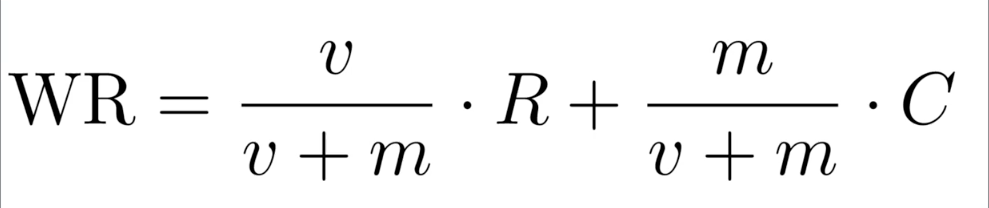

In [13]:

####################
# Bayesian Average Rating Score
####################

# 12481                                    The Dark Knight
# 314                             The Shawshank Redemption
# 2843                                          Fight Club
# 15480                                          Inception
# 292                                         Pulp Fiction



def bayesian_average_rating(n, confidence=0.95):
    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

bayesian_average_rating([34733, 4355, 4704, 6561, 13515, 26183, 87368, 273082, 600260, 1295351])

bayesian_average_rating([37128, 5879, 6268, 8419, 16603, 30016, 78538, 199430, 402518, 837905])

df = pd.read_csv("/kaggle/input/imdbratingsdataset/imdb_ratings.csv")
df = df.iloc[0:, 1:]


df["bar_score"] = df.apply(lambda x: bayesian_average_rating(x[["one", "two", "three", "four", "five",
                                                                "six", "seven", "eight", "nine", "ten"]]), axis=1)
df.sort_values("bar_score", ascending=False).head(20)


# Weighted Average Ratings
# IMDb publishes weighted vote averages rather than raw data averages.
# The simplest way to explain it is that although we accept and consider all votes received by users,
# not all votes have the same impact (or ‘weight’) on the final rating.

# When unusual voting activity is detected,
# an alternate weighting calculation may be applied in order to preserve the reliability of our system.
# To ensure that our rating mechanism remains effective,
# we do not disclose the exact method used to generate the rating.
#
# See also the complete FAQ for IMDb ratings.

/tmp/ipykernel_18/1185045051.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/1185045051.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/1185045051.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_part += (k + 1) * (n[k] + 1) / (N + K)
/tmp/ipykernel_18/1185045051.py:23: FutureWa

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.14539
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.94002
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.89596
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.81250
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.76793
6,167260,7. The Lord of the Rings: The Return of ...,8.90000,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.75204
5,108052,6. Schindler's List (1993),8.90000,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.74361
11,109830,12. Forrest Gump (1994),8.80000,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.69915
12,1375666,13. Inception (2010),8.70000,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.69315
10,137523,11. Fight Club (1999),8.80000,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.67448
